In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
df = pd.read_csv("/Users/dhruvpai/Downloads/practicals/customer_shopping_data.csv")
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [4]:
df.shape

(99457, 10)

In [5]:
df.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


In [6]:
df.drop(columns=['invoice_no', 'customer_id', "invoice_date"], inplace=True)

In [7]:
df.isna().sum()

gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
shopping_mall     0
dtype: int64

In [8]:
df['category'].unique()

array(['Clothing', 'Shoes', 'Books', 'Cosmetics', 'Food & Beverage',
       'Toys', 'Technology', 'Souvenir'], dtype=object)

In [9]:
shopping_mall_sales = df[['shopping_mall', 'category', 'price']].groupby(['shopping_mall', 'category']).sum()
shopping_mall_sales

price
shopping_mall category                   
Cevahir AVM   Books              11998.80
              Clothing         1554414.40
              Cosmetics          88394.84
              Food & Beverage    11992.39
              Shoes             884050.41
...                                   ...
Zorlu Center  Food & Beverage    11589.68
              Shoes             953670.13
              Souvenir            8398.68
              Technology        803250.00
              Toys               54691.84

[80 rows x 1 columns]

In [10]:
total_sales_for_malls = shopping_mall_sales.groupby('shopping_mall')['price'].sum()
total_sales_for_malls

shopping_mall
Cevahir AVM           3433671.84
Emaar Square Mall     3390408.31
Forum Istanbul        3336073.82
Istinye Park          6717077.54
Kanyon               13710755.24
Mall of Istanbul     13851737.62
Metrocity            10249980.07
Metropol AVM          6937992.99
Viaport Outlet        3414019.46
Zorlu Center          3509649.02
Name: price, dtype: float64

/var/folders/9j/bw9yqrxj5h369mrl2hzrdgbm0000gn/T/ipykernel_56257/85430788.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sbn.barplot(data=total_sales_per_mall_df, x='shopping_mall', y='price', palette='Blues')


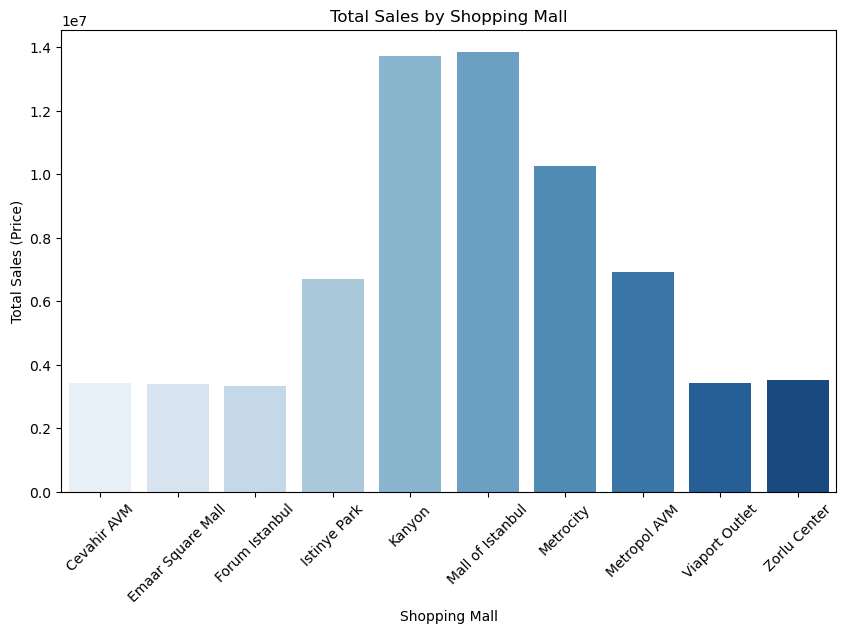

In [11]:
total_sales_per_mall_df = total_sales_for_malls.reset_index()

# Plotting with Seaborn
plt.figure(figsize=(10, 6))
sbn.barplot(data=total_sales_per_mall_df, x='shopping_mall', y='price', palette='Blues')

# Adding labels and title
plt.title("Total Sales by Shopping Mall")
plt.xlabel("Shopping Mall")
plt.ylabel("Total Sales (Price)")
plt.xticks(rotation=45)
plt.show()

In [12]:
shopping_mall_sales_quantity = df[['shopping_mall', "quantity"]].groupby('shopping_mall').sum()
shopping_mall_sales_quantity

,quantity
shopping_mall,
Cevahir AVM,14949
Emaar Square Mall,14501
Forum Istanbul,14852
Istinye Park,29465
Kanyon,59457
Mall of Istanbul,60114
Metrocity,44894
Metropol AVM,30530
Viaport Outlet,14716


/var/folders/9j/bw9yqrxj5h369mrl2hzrdgbm0000gn/T/ipykernel_56257/1403549255.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sbn.barplot(data=shopping_mall_sales_quantity_df, x='shopping_mall', y='quantity', palette='viridis')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Cevahir AVM'),
  Text(1, 0, 'Emaar Square Mall'),
  Text(2, 0, 'Forum Istanbul'),
  Text(3, 0, 'Istinye Park'),
  Text(4, 0, 'Kanyon'),
  Text(5, 0, 'Mall of Istanbul'),
  Text(6, 0, 'Metrocity'),
  Text(7, 0, 'Metropol AVM'),
  Text(8, 0, 'Viaport Outlet'),
  Text(9, 0, 'Zorlu Center')])

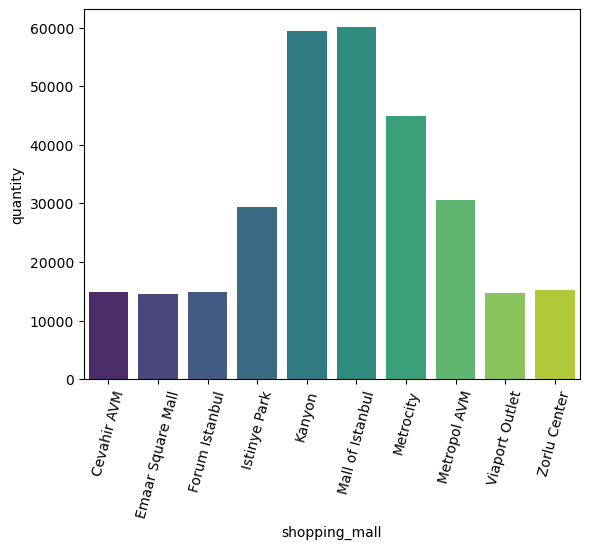

In [13]:
shopping_mall_sales_quantity_df = shopping_mall_sales_quantity.reset_index()
sbn.barplot(data=shopping_mall_sales_quantity_df, x='shopping_mall', y='quantity', palette='viridis')
plt.xticks(rotation=75)

In [14]:
sales_according_to_age =  df[['shopping_mall','age', "price"]].groupby(['shopping_mall','age']).sum()
sales_according_to_age

price
shopping_mall age          
Cevahir AVM   18   69543.24
              19   78881.32
              20   52654.06
              21   58478.41
              22   72593.84
...                     ...
Zorlu Center  65   64861.51
              66   68745.37
              67   59100.83
              68   65967.94
              69   44848.27

[520 rows x 1 columns]

In [15]:
mall_total_quantity_sales = df[['shopping_mall', "quantity"]].groupby('shopping_mall').sum()
mall_total_quantity_sales

,quantity
shopping_mall,
Cevahir AVM,14949
Emaar Square Mall,14501
Forum Istanbul,14852
Istinye Park,29465
Kanyon,59457
Mall of Istanbul,60114
Metrocity,44894
Metropol AVM,30530
Viaport Outlet,14716


/var/folders/9j/bw9yqrxj5h369mrl2hzrdgbm0000gn/T/ipykernel_56257/1153410691.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sbn.barplot(data=mall_total_quantity_sales.reset_index(), x='shopping_mall', y='quantity', palette='cool')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Cevahir AVM'),
  Text(1, 0, 'Emaar Square Mall'),
  Text(2, 0, 'Forum Istanbul'),
  Text(3, 0, 'Istinye Park'),
  Text(4, 0, 'Kanyon'),
  Text(5, 0, 'Mall of Istanbul'),
  Text(6, 0, 'Metrocity'),
  Text(7, 0, 'Metropol AVM'),
  Text(8, 0, 'Viaport Outlet'),
  Text(9, 0, 'Zorlu Center')])

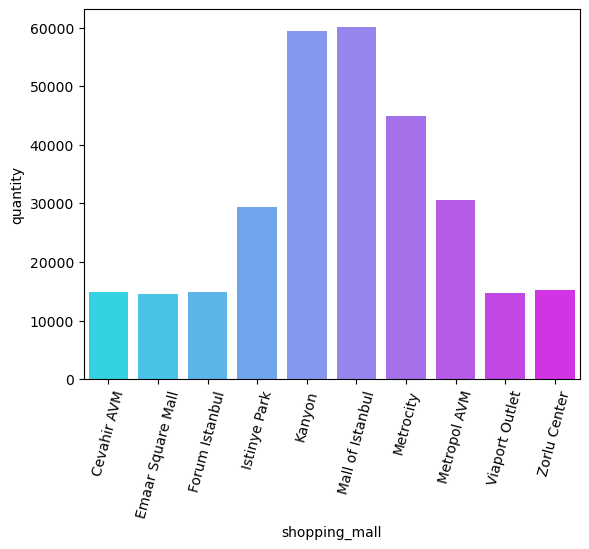

In [16]:
sbn.barplot(data=mall_total_quantity_sales.reset_index(), x='shopping_mall', y='quantity', palette='cool')
plt.xticks(rotation=75)

In [17]:
category_data = df[['category', 'quantity', 'price']].groupby('category').sum().sort_values(by='price', ascending=False).reset_index()
category_data

,category,quantity,price
0,Clothing,103558,31075684.64
1,Shoes,30217,18135336.89
2,Technology,15021,15772050.00
3,Cosmetics,45465,1848606.90
4,Toys,30321,1086704.64
5,Food & Beverage,44277,231568.71
6,Books,14982,226977.30
7,Souvenir,14871,174436.83


/var/folders/9j/bw9yqrxj5h369mrl2hzrdgbm0000gn/T/ipykernel_56257/2878194263.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sbn.barplot(data=category_data, x='category', y='price', palette='cool',ax=axes[0])
/var/folders/9j/bw9yqrxj5h369mrl2hzrdgbm0000gn/T/ipykernel_56257/2878194263.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation=75)
/var/folders/9j/bw9yqrxj5h369mrl2hzrdgbm0000gn/T/ipykernel_56257/2878194263.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sbn.barplot(data=category_data, x='category', y='quantity', palette='cool', ax=axes[1])
/var/folders/9j/bw9

[Text(0, 0, 'Clothing'),
 Text(1, 0, 'Shoes'),
 Text(2, 0, 'Technology'),
 Text(3, 0, 'Cosmetics'),
 Text(4, 0, 'Toys'),
 Text(5, 0, 'Food & Beverage'),
 Text(6, 0, 'Books'),
 Text(7, 0, 'Souvenir')]

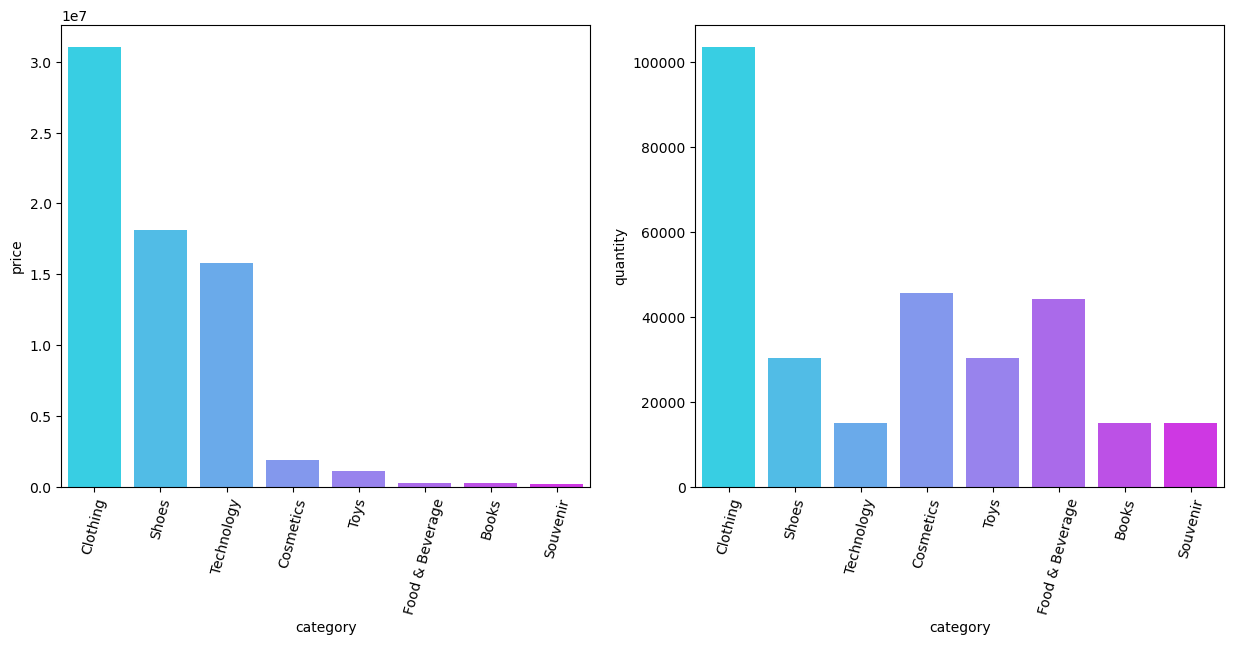

In [18]:
fig, axes=plt.subplots(1,2, figsize=(15,6))

sbn.barplot(data=category_data, x='category', y='price', palette='cool',ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation=75)

sbn.barplot(data=category_data, x='category', y='quantity', palette='cool', ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation=75)

EXPLANATION:
-----

Loading the Dataset:
The code loads the customer shopping data CSV file into a DataFrame called df. Calling .head() displays the first few rows, providing an overview of the dataset structure and column names.

Exploring Data Shape and Statistics:
.shape reveals the number of rows and columns, while .describe() generates summary statistics (mean, standard deviation, min, max) for numerical columns. This provides insight into data size and distribution.

Dropping Irrelevant Columns:
The code removes unnecessary columns that don’t contribute to the analysis. invoice_no, customer_id, and invoice_date are dropped to reduce the dataset’s size and focus on relevant attributes like category, price, shopping_mall, quantity, and age.

Checking for Missing Values:
This checks for missing values in each column. The sum of null values per column identifies any data gaps that might require filling or cleaning. Missing data can affect calculations and visualizations, so it’s essential to detect them early.

Identifying Unique Categories:
This line lists the unique values in the category column, showing the different product categories. Understanding these categories aids in interpreting sales trends across different types of products.

Summing Sales by Shopping Mall and Category:
Here, the code groups data by shopping_mall and category and sums the price for each group, resulting in total sales for each category in each mall. Grouping by shopping_mall and category allows for detailed analysis of sales distribution across locations and categories.

Calculating Total Sales per Mall:
The code sums up the total price (sales) for each shopping_mall to get a total sales amount per mall. reset_index() transforms the result back into a DataFrame for easier handling in visualization.
This analysis gives an overview of which malls generate the highest sales, potentially highlighting the most profitable locations.

Visualizing Total Sales by Mall:
A bar plot is created to visualize total sales by each mall using Seaborn. Customizations like figsize, title, and rotation make the plot readable and informative.

Summing Quantities Sold per Mall:
This code calculates the total quantity of items sold per mall by grouping and summing quantity. The result is visualized as a bar plot, showing each mall’s performance in terms of items sold, regardless of price.
This analysis can reveal malls with higher volume sales, even if total revenue differs.

Analyzing Sales by Age and Mall:
The code groups by shopping_mall and age, summing price to see how much each age group contributes to each mall’s sales. Grouping by age helps understand demographic patterns, potentially guiding targeted marketing.

Summing Quantity per Mall (Again):
Similar to step 10, this groups by shopping_mall to calculate the total quantity sold per mall. It’s plotted with a different color palette, adding variety to distinguish it from previous plots.

Summing Sales and Quantity by Category:
The code groups data by category, calculating total price and quantity per category, then sorts by price in descending order. Sorting helps quickly identify the most profitable product categories.

Visualizing Sales and Quantity by Category:
This code creates a two-part bar plot:
The first plot shows total sales (price) by category.
The second plot shows total quantity sold by category.

This visualization provides insight into both revenue and sales volume per category, helping to identify popular products and top revenue-generating items.

Summary:
---------
This code covers a range of analyses, from mall-level sales to category-specific patterns and age-group breakdowns. Key methods like .groupby() for aggregations and Seaborn for visualization make it effective for a comprehensive data overview.






